<a href="https://colab.research.google.com/github/Talendar/deep_learning_exercises/blob/master/deep_learning_exercises/5_mnist_with_cnn/dl_ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.callbacks import Callback

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
class ClearCallback(Callback):
    """ Handles the cleaning of the log during the training of a model. """

    def on_epoch_end(self, epoch, logs=None):
        """ Clears the log. Called when a training epoch ends. """
        clear_output(wait=True)

# Preparing data

Loading data:

In [162]:
(training_data, training_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

print("\nTraining data: {}  |  Training labels: {}".format(training_data.shape, training_labels.shape))
print("    Test data: {}  |  Test labels: {}".format(test_data.shape, test_labels.shape))


Training data: (60000, 28, 28)  |  Training labels: (60000,)
    Test data: (10000, 28, 28)  |  Test labels: (10000,)


Normalizing data:

In [163]:
training_data = training_data / 255
test_data = test_data / 255

Exploring data:

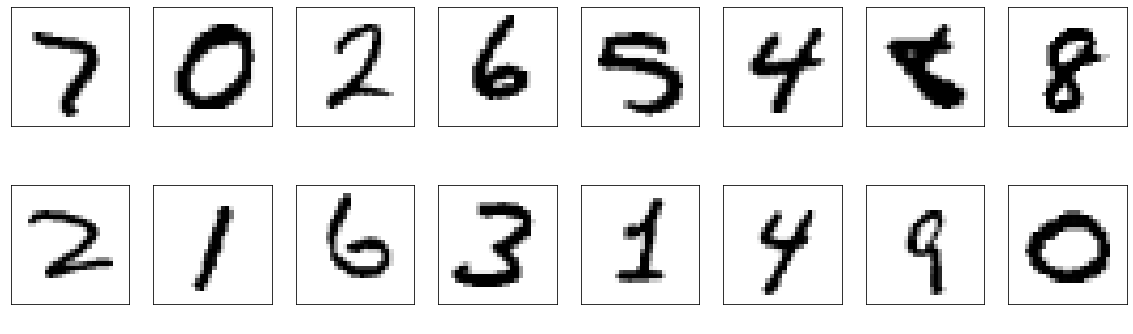

In [164]:
rand_idx = np.random.randint(0, len(training_data) - 4)

plt.figure(figsize=(20,6))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_data[rand_idx + i], cmap=plt.cm.binary)
    plt.xlabel(training_labels[rand_idx + i], fontsize=20).set_color("white")
plt.show()

# MLP model

Building a multi-layer perceptron (MLP) and fitting it to the data. A MLP is the standard feedforward neural network, consisting only of fully-connected (dense) layers.

In [21]:
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

mlp_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=["accuracy"])

mlp_model.fit(training_data, training_labels, 
          epochs=5, 
          callbacks=[ClearCallback()])

test_loss, test_acc = mlp_model.evaluate(test_data,  test_labels, verbose=2)
print('\nTest accuracy: %.2f%%\n\n' % (test_acc * 100))

1875/1875 [==============================] - 3s 2ms/step - loss: 1.5067 - accuracy: 0.9561
313/313 - 1s - loss: 1.5132 - accuracy: 0.9493

Test accuracy: 94.93%


Auxiliary functions

In [104]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  color = "green" if predicted_label == true_label else "red"

  plt.xlabel("{} ({:2.0f}%)  |  {}\n".format(predicted_label, 
                                         100*np.max(predictions_array), true_label),
                                color=color, fontweight='bold', fontsize=13)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')


def show_predictions(predictions, num_images=7, figsize=(16, 5)):
    b = np.random.randint(0, len(predictions) - num_images)
    plt.figure(figsize=figsize)
    for i in range(num_images):
        plt.subplot(2, num_images, i+1)
        plot_image(b+i, predictions[b + i], test_labels, test_data)
        plt.subplot(2, num_images, i+1+num_images)
        plot_value_array(b+i, predictions[b + i], test_labels)
    plt.tight_layout()
    plt.show()

Visualizing the predictions made by the MLP

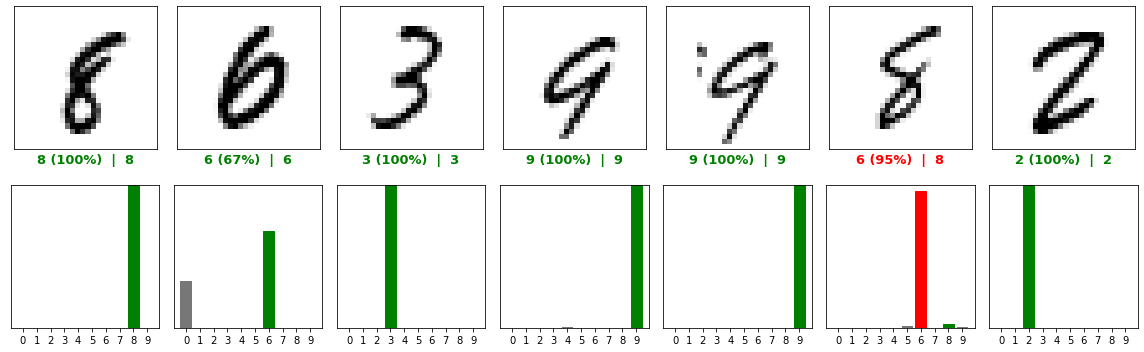

In [110]:
show_predictions(mlp_model.predict(test_data))

#CNN model

Reshaping images (we need a new dimension for the image's channel!):

In [165]:
cnn_training_data = training_data.reshape(len(training_data), 28, 28, 1)
cnn_test_data = test_data.reshape(len(test_data), 28, 28, 1)

print("Training data shape: {}".format(cnn_training_data.shape))
print("    Test data shape: {}".format(cnn_test_data.shape))

Training data shape: (60000, 28, 28, 1)
    Test data shape: (10000, 28, 28, 1)


Building a CNN model and fitting it to the data:

In [185]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

cnn_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=["accuracy"])

cnn_model.fit(cnn_training_data, training_labels, 
          epochs=10, 
          callbacks=[ClearCallback()])

test_loss, test_acc = cnn_model.evaluate(cnn_test_data,  test_labels, verbose=2)
print('\nTest accuracy: %.2f%%' % (test_acc * 100))

1875/1875 [==============================] - 5s 3ms/step - loss: 1.4749 - accuracy: 0.9863
313/313 - 1s - loss: 1.4732 - accuracy: 0.9878

Test accuracy: 98.78%


Visualizing the predictions made by the CNN

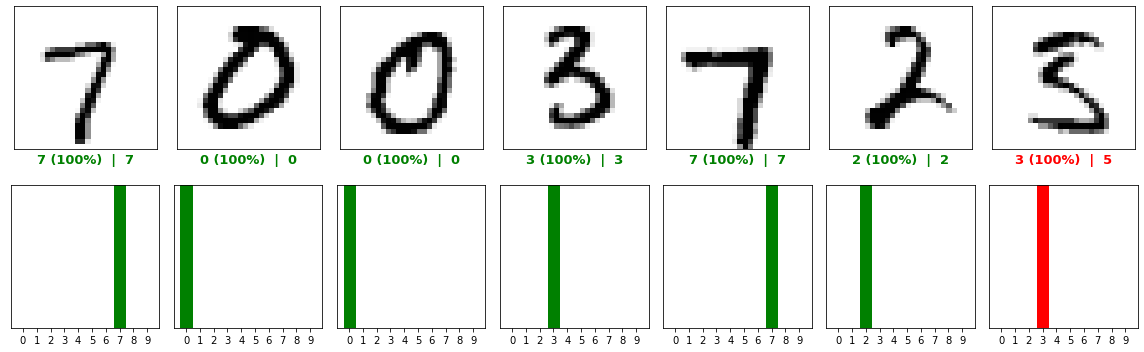

In [215]:
show_predictions(cnn_model.predict(cnn_test_data))